In [24]:
import numpy as np
import scipy.stats as stats
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.stats import t, norm


In [25]:
n = 10
# Create a random matrix A
A = np.random.rand(n, n)
A_trans = A * 2 - 1

# Create a symmetric positive definite matrix using A^T * A
M = np.dot(A_trans.T, A_trans)

# Normalize the diagonal to be ones
diagonal = np.sqrt(np.diag(M))
M_normalised = M / diagonal[:, None] / diagonal[None, :]

# Check eigenvalues to confirm positive definiteness
eigenvalues = np.linalg.eigvals(M_normalised)
print(eigenvalues)

[3.06245969 2.04166491 1.51052685 1.31891022 0.83327547 0.6007247
 0.00854939 0.04579395 0.34993303 0.22816178]


In [26]:
v = 5
R = np.eye(n)

A = np.linalg.cholesky(R)

Z = np.random.normal(size=(10000, n)).T

s = np.random.chisquare(v, (10000, n)).T

y = A.dot(Z)

x = np.sqrt(v) * y / np.sqrt(s)

# Assuming you want to calculate the CDF of x under a t-distribution for each component

u = t.cdf(x, df=v)

u.shape

(10, 10000)

In [27]:
rng = np.random.default_rng(68)
N = n
h = 10**-4
t = np.arange(0,1.00,h)
Z = (rng.standard_normal(size=(len(t),N))).T
# Cholesky decomposition
A = np.linalg.cholesky(M_normalised)
# Create correlated normal random variables
W = norm.ppf(u)
a = 10
sig = 1
X = 5*np.ones((N, len(t)))
for i in range(len(t)):
    
    for asset in range(N):
           X[asset, i] = X[asset, i-1] + h * a * (np.mean(X[:, i-1]) - X[asset, i-1]) + sig * np.sqrt(h) * W[asset, i-1]


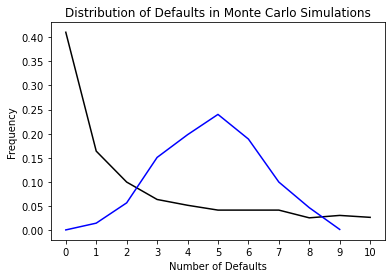

In [32]:
import numpy as np
from scipy.stats import t, norm
import matplotlib.pyplot as plt

# Simulation parameters
v = 5  # Degrees of freedom for t-distribution
h = 10**(-4)
threshold = 4.3  # Default threshold for asset value
num_simulations = 1000  # Number of Monte Carlo simulations
time = np.arange(0, 1.00, h)
n = 10  # Number of assets (assuming n was intended to be defined)
a = 10  # Mean reversion strength
sig = 1  # Volatility

# Placeholder for the normalized correlation matrix (needs actual values)
M_normalised = np.eye(n)  # Simplified as an identity matrix for demonstration

# Initialize default counter
defaults_per_simulation = np.zeros(num_simulations)

# Run Monte Carlo simulations
for sim in range(num_simulations):
    # Cholesky decomposition for correlated random variables
    A = np.linalg.cholesky(M_normalised)
    # Initial state
    X = 5 * np.ones((n, len(time)))
    # Generate random walks
    for i in range(1, len(time)):
        Z = np.random.normal(size=n)
        y = A.dot(Z)
        s = np.random.chisquare(v, n)
        x = np.sqrt(v) * y / np.sqrt(s)
        u = t.cdf(x, df=v)
        W = norm.ppf(u)
        # Update asset values using the model
        X[:, i] = X[:, i-1] + h * a * (np.mean(X[:, i-1]) - X[:, i-1]) + sig * np.sqrt(h) * W
    # Count defaults
    defaults_per_simulation[sim] = np.sum(np.min(X, axis=1) < threshold)

unique_counts_10, counts_frequencies_10 = np.unique(defaults_per_simulation, return_counts=True)

# Normalize the frequencies to get probabilities (PMF)
probabilities_10 = counts_frequencies_10 / num_simulations
v = 5  # Degrees of freedom for t-distribution
h = 10**(-4)
time = np.arange(0, 1.00, h)

threshold = 4.3  # Default threshold for asset value
num_simulations = 1000  # Number of Monte Carlo simulations
n = 10  # Number of assets (assuming n was intended to be defined)
a = 0  # Mean reversion strength
sig = 1  # Volatility
 # Time step size

# Placeholder for the normalized correlation matrix (needs actual values)
M_normalised = np.eye(n)  # Simplified as an identity matrix for demonstration

# Initialize default counter
defaults_per_simulation_0 = np.zeros(num_simulations)

# Run Monte Carlo simulations
for sim in range(num_simulations):
    # Cholesky decomposition for correlated random variables
    A = np.linalg.cholesky(M_normalised)
    # Initial state
    X = 5 * np.ones((n, len(time)))
    # Generate random walks
    for i in range(1, len(time)):
        Z = np.random.normal(size=n)
        y = A.dot(Z)
        s = np.random.chisquare(v, n)
        x = np.sqrt(v) * y / np.sqrt(s)
        u = t.cdf(x, df=v)
        W = norm.ppf(u)
        # Update asset values using the model
        X[:, i] = X[:, i-1] + h * a * (np.mean(X[:, i-1]) - X[:, i-1]) + sig * np.sqrt(h) * W
    # Count defaults
    defaults_per_simulation_0[sim] = np.sum(np.min(X, axis=1) < threshold)
    
unique_counts_0, counts_frequencies_0 = np.unique(defaults_per_simulation_0, return_counts=True)

# Normalize the frequencies to get probabilities (PMF)
probabilities_0 = counts_frequencies_0 / num_simulations
    
# Plot the distribution of defaults
plt.plot(unique_counts_10, probabilities_10, color = 'black',label='a=10')
plt.plot(unique_counts_0, probabilities_0, color = 'blue',label='a=0')
plt.title('Distribution of Defaults in Monte Carlo Simulations')
plt.xlabel('Number of Defaults')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, 11, 1))
plt.show()
